<h1>Лаборатораня работа 1 - Федотов Андрей (Вариант 15)</h1>

---

In [27]:
import numpy as np
import functools
import timeit
import typing
import matplotlib.pyplot as plt

def get_usage_time(
    *, number: int = 1, setup: str = 'pass', ndigits: int = 3
) -> typing.Callable:
    def decorator(func: typing.Callable) -> typing.Callable:
        @functools.wraps(func)
        def wrapper(*args, **kwargs) -> float:
            usage_time = timeit.timeit(
                lambda: func(*args, **kwargs),
                setup=setup,
                number=number,
            )
            return round(usage_time / number, ndigits)

        return wrapper

    return decorator

vector = []
vector = np.random.randint(1, 101, 500001)

---

<h2>Постоянная функция</h2>

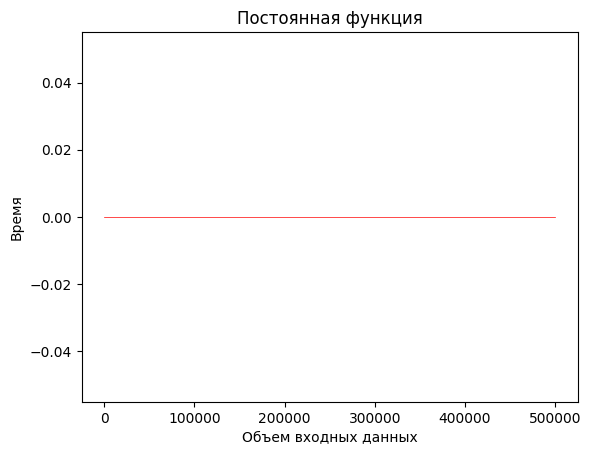

In [38]:
def f1(n):
    return 15


func = get_usage_time(ndigits=5, number=5)(f1)


items = [i for i in range(1, len(vector), 700)]
times = [func(vector[:i]) for i in items]



fig = plt.plot(items, times, 'r-', linewidth = 0.5)
plt.title('Постоянная функция')
ax = plt.gca()
ax.set_xlabel('Объем входных данных')
ax.set_ylabel('Время')
plt.savefig('graph1.png')

---

<h2>Произведение элементов</h2>

C:\Users\fed20\AppData\Local\Temp\ipykernel_13936\2511652580.py:4: RuntimeWarning: overflow encountered in scalar multiply
  res *= vector[i]


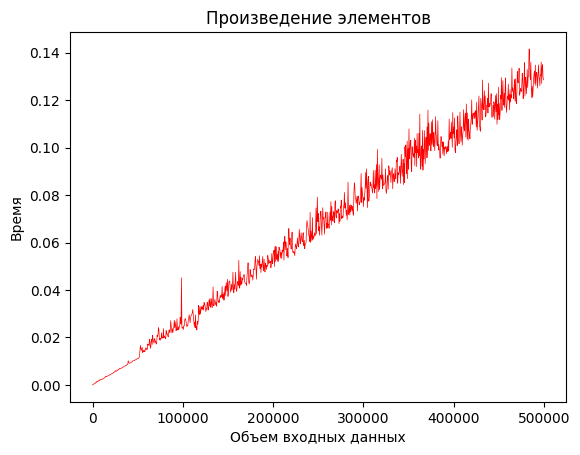

In [42]:
def f3(n):
    res = 1
    for i in range(1, n):
        res *= vector[i]
    return res


func = get_usage_time(ndigits=5, number=5)(f3)

items = range(1, 500001, 500)
times = [func(i) for i in items]



fig = plt.plot(items, times, 'r-', linewidth = 0.5)
plt.title('Произведение элементов')
ax = plt.gca()
ax.set_xlabel('Объем входных данных')
ax.set_ylabel('Время')
plt.savefig('graph3.png')

---

<h2>Поиск минимума простым перебором</h2>

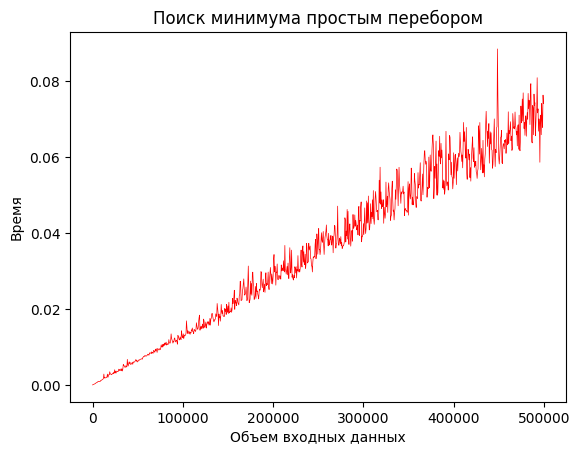

In [50]:
def f6(n):
    min = vector[0]
    for i in vector[:n]:
        if i < min:
            min = i
    return min


func = get_usage_time(ndigits=5)(f6)

items = range(1, 500001, 500)
times = [func(i) for i in items]
for i in range(2):
    for j in range(len(items)):
        times[j] += func(items[j])
for i in range(len(times)):
    times[i] /= 3


fig = plt.plot(items, times, 'r-', linewidth = 0.5)
plt.title('Поиск минимума простым перебором')
ax = plt.gca()
ax.set_xlabel('Объем входных данных')
ax.set_ylabel('Время')
plt.savefig('graph6.png')

---

<h2>Среднее арифметическое</h2>

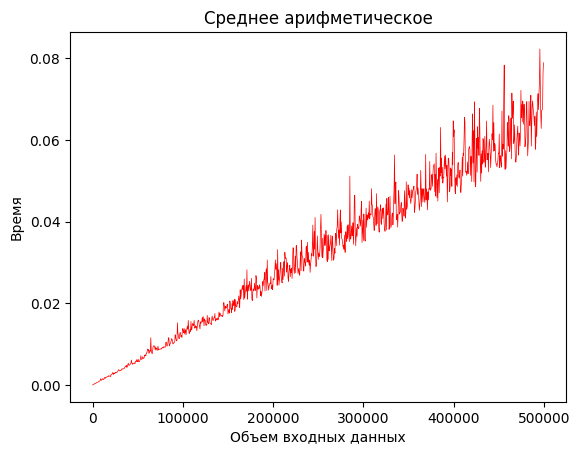

In [53]:
def f7(n):
    return sum(vector[:n])/n


func = get_usage_time(ndigits=5)(f7)

items = range(1, 500001, 500)
times = [func(i) for i in items]
for i in range(2):
    for j in range(len(items)):
        times[j] += func(items[j])
for i in range(len(times)):
    times[i] /= 3



fig = plt.plot(items, times, 'r-', linewidth = 0.5)
plt.title('Среднее арифметическое')
ax = plt.gca()
ax.set_xlabel('Объем входных данных')
ax.set_ylabel('Время')
plt.savefig('graph7.png')

---

<h2>Умножение матриц</h2>

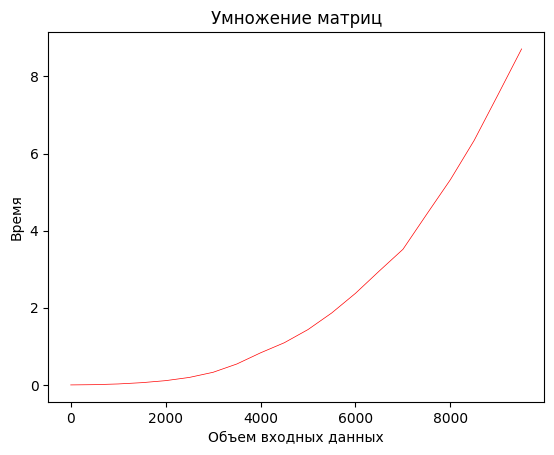

In [54]:
def task2(n):
    matrix_size = (n, n)
    matrix_a = np.random.rand(*matrix_size)
    matrix_b = np.random.rand(*matrix_size)
    result = np.dot(matrix_a, matrix_b)
    return result


func = get_usage_time(ndigits=5)(task2)

items = [i for i in range(1, 10000, 500)]
times = [func(i) for i in range(1, 10000, 500)]
for i in range(2):
    z = 1
    for j in range(len(times)):
        times[j] += func(z)
        z += 10
for i in range(len(times)):
    times[i] /= 3


fig = plt.plot(items, times, 'r-', linewidth = 0.5)
plt.title('Умножение матриц')
ax = plt.gca()
ax.set_xlabel('Объем входных данных')
ax.set_ylabel('Время')
plt.savefig('task2.png')